# The generation of the stationary and non-stationary time series

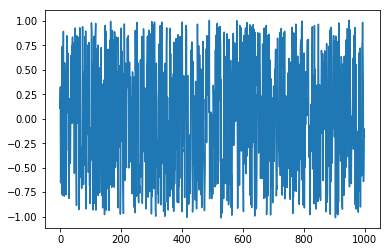

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n=1000
x=np.arange(n)
y_=np.random.uniform(-1,1,[n])

mu=0
sigma=0.01
e= np.random.normal(mu, sigma, n)
#stationary series
y=y_+e

plt.plot(x,y)
plt.show()

In [2]:
import statsmodels.tsa.api as smt

result = smt.stattools.adfuller(y)
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -15.323775
p-value = 0.000000


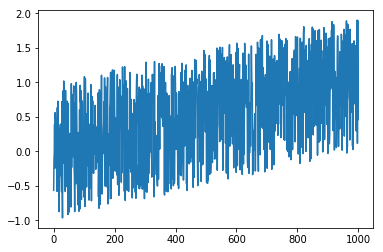

In [3]:
y_=np.random.uniform(-1,1,[n])

mu=0
sigma=0.01
e= np.random.normal(mu, sigma, n)
t = [v/1000 for v in range(0,n)]
y=y_+e+t

plt.plot(x,y)
plt.show()

In [4]:
import statsmodels.tsa.api as smt

result = smt.stattools.adfuller(y)
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -2.369615
p-value = 0.150497


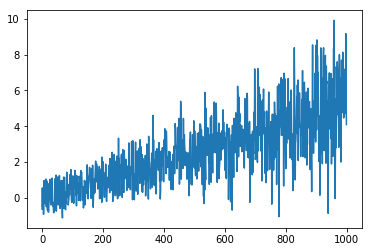

In [5]:
y_=np.random.uniform(-1,1,[n])

mu=0
sigma=0.01
e = np.zeros(n)
for i in range(n):
    e[i]= np.random.normal(mu, sigma+i/500, 1)
t = [v/200 for v in range(0,n)]
y=y_+e+t

plt.plot(x,y)
plt.show()

In [6]:
import statsmodels.tsa.api as smt

result = smt.stattools.adfuller(y)
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -0.912646
p-value = 0.783780


# Trends and decomposition

In [7]:
import pandas as pd
import numpy as np
import scipy.stats


df = pd.read_csv('data\\ts_1.csv', engine="python")
df.head()

,Unnamed: 0,TRDATETIME,amount
0,0,21OCT17:00:00:00,5023.0
1,1,12OCT17:12:24:07,20000.0
2,2,05DEC17:00:00:00,767.0
3,3,21OCT17:00:00:00,2031.0
4,4,24OCT17:13:14:24,36562.0


In [24]:
from datetime import datetime

#timestamps to daily
df['TRDATETIME']=pd.to_datetime(df['TRDATETIME'], format='%d%b%y:%H:%M:%S')
df['TRDATETIME']=df['TRDATETIME'].dt.round('1d')  

In [23]:
#aggregation 
df_daily=df.groupby('TRDATETIME', as_index=False).agg({"amount": "sum"})
df_daily=df_daily.sort_values('TRDATETIME')
df_daily.head()

,TRDATETIME,amount
0,2016-10-07,6307.00
1,2016-10-08,91026.59
2,2016-10-09,2446.15
3,2016-10-10,86538.95
4,2016-10-11,570745.17


Text(0, 0.5, 'Summ')

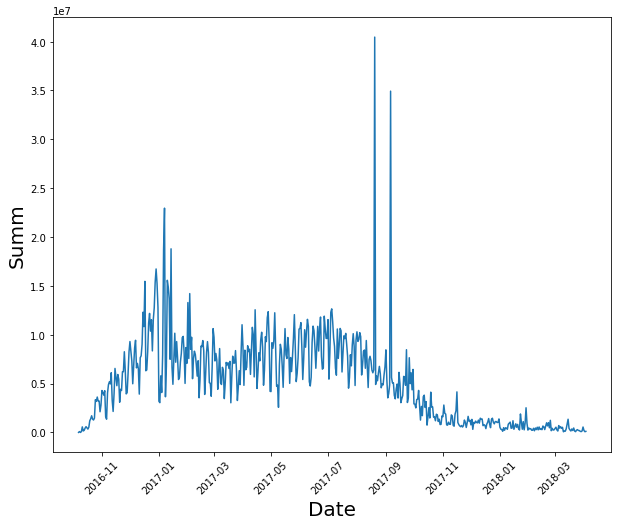

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))

#указываем X и Y
plt.plot(df_daily['TRDATETIME'],df_daily['amount'])

plt.xticks(rotation=45)

plt.xlabel(u'Date', fontsize = 20)
plt.ylabel(u'Summ', fontsize = 20)


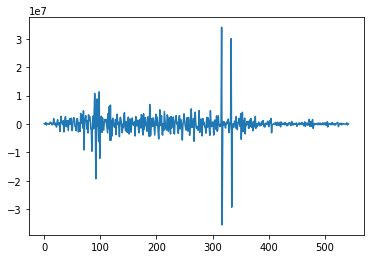

In [21]:
#trend subtraction using differences
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

diff = difference(dataset=df_daily['amount'], interval=1)

plt.plot(diff)
plt.show()


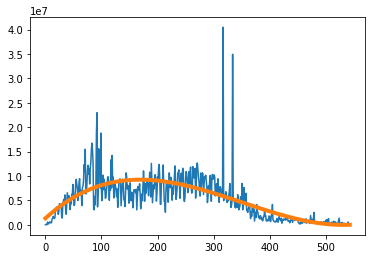

In [12]:
#find the trend

def trendline(data, order=9):
    #polynomial trend
    trend = np.polyfit(data.index.values, list(data), order)
    return np.poly1d(trend)(data.index.values)

trend = trendline(df_daily['amount'], 3)
plt.plot(df_daily['amount'])
plt.plot(trend, linewidth=4)
plt.show()

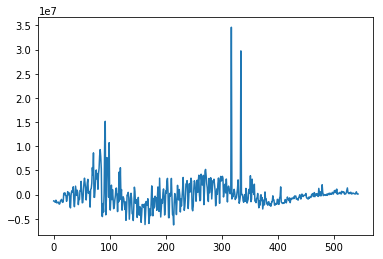

In [13]:
plt.plot(df_daily['amount']-trend)
plt.show()

In [15]:
#data with the clear seasonality
df_ts = pd.read_csv('data\\amCharts.csv', engine="python")
df_ts.head()

df_ts["date"]=pd.to_datetime(df_ts["date"], format='%Y-%m-%d')

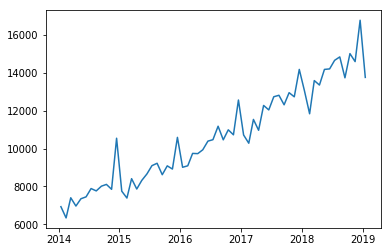

In [16]:
plt.plot(df_ts["date"],df_ts['spent'],)
plt.show()

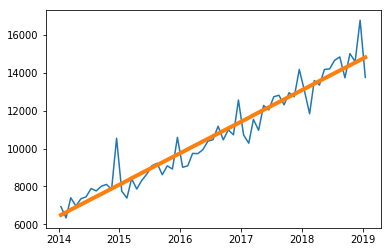

In [17]:
#linear trend extraction
trend = trendline(df_ts['spent'], 1)
plt.plot(df_ts["date"],df_ts['spent'])
plt.plot(df_ts["date"],trend, linewidth=4)
plt.show()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
pd.__version__
df_ts.index=pd.DatetimeIndex(freq="m",start=df_ts["date"][0],periods=len(df_ts["date"]))

In [19]:
#moving average
result = seasonal_decompose((df_ts["spent"]), model='additive')

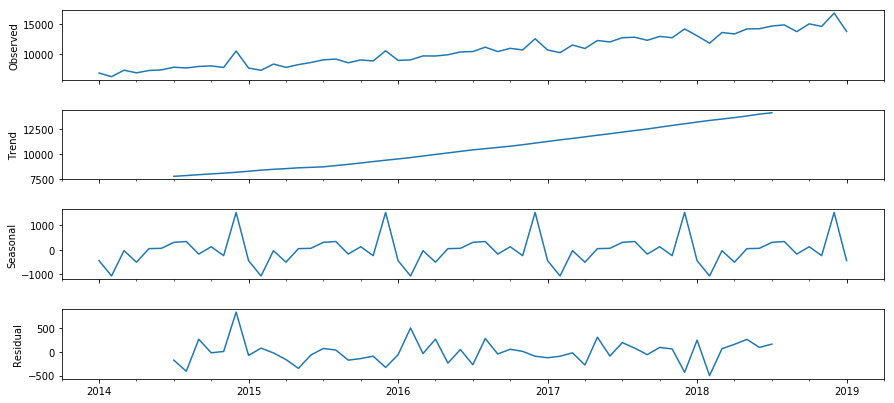

In [20]:
fig=result.plot()
fig.set_figheight(6)
fig.set_figwidth(14)

plt.show()